# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/src/data/rez_sample_03ALL/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Unnamed: 0,Branch,Option,Build Time,Binary Size
0,0,isqlite-00001-00002,"['--disable-shared', '--disable-option-checkin...",0.0110,9648880
1,1,isqlite-00001-00003,"['--disable-shared', '--disable-largefile', '-...",30.2950,9648880
2,2,isqlite-00001-00004,"['--disable-shared', '--disable-option-checkin...",0.0110,9648880
3,3,isqlite-00001-00005,"['--disable-shared', '--disable-amalgamation',...",0.0115,9648880
4,4,isqlite-00001-00006,"['--disable-shared', '--disable-largefile', '-...",70.2090,10190888
...,...,...,...,...,...
375,375,isqlite-00020-00015,"['--disable-shared', '--disable-largefile', '-...",0.0100,10084648
376,376,isqlite-00020-00016,"['--disable-shared', '--disable-libtool-lock',...",27.6225,10084648
377,377,isqlite-00020-00017,"['--disable-shared', '--disable-threadsafe', '...",29.1355,10084648
378,378,isqlite-00020-00018,"['--disable-shared', '--disable-libtool-lock',...",24.9405,10084648


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Unnamed: 0,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,0,isqlite-00001-00002,"['--disable-shared', '--disable-option-checkin...",0.0110,9648880,isqlite,00001,00002
1,1,isqlite-00001-00003,"['--disable-shared', '--disable-largefile', '-...",30.2950,9648880,isqlite,00001,00003
2,2,isqlite-00001-00004,"['--disable-shared', '--disable-option-checkin...",0.0110,9648880,isqlite,00001,00004
3,3,isqlite-00001-00005,"['--disable-shared', '--disable-amalgamation',...",0.0115,9648880,isqlite,00001,00005
4,4,isqlite-00001-00006,"['--disable-shared', '--disable-largefile', '-...",70.2090,10190888,isqlite,00001,00006
...,...,...,...,...,...,...,...,...
375,375,isqlite-00020-00015,"['--disable-shared', '--disable-largefile', '-...",0.0100,10084648,isqlite,00020,00015
376,376,isqlite-00020-00016,"['--disable-shared', '--disable-libtool-lock',...",27.6225,10084648,isqlite,00020,00016
377,377,isqlite-00020-00017,"['--disable-shared', '--disable-threadsafe', '...",29.1355,10084648,isqlite,00020,00017
378,378,isqlite-00020-00018,"['--disable-shared', '--disable-libtool-lock',...",24.9405,10084648,isqlite,00020,00018


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN   0.0105  23.1470   0.0105   0.0105  24.1540   0.0100   
00002     0.0110      NaN  25.6090   0.0095   0.0105  25.7535   0.0105   
00003    30.2950  30.3415      NaN  30.2335  31.2805   0.0100  30.3130   
00004     0.0110   0.0115  28.8435      NaN   0.0105  30.0875   0.0100   
00005     0.0115   0.0115  28.7575   0.0110      NaN  29.9565   0.0100   
00006    70.2090  70.0185   0.0095  32.6560  70.6045      NaN  70.3785   
00007     0.0105   0.0120  23.3440   0.0100   0.0100  24.5230      NaN   
00008    25.7000  26.9125   0.0095  25.8575  25.7625   0.0095  25.8170   
00009    32.7010  33.5065   0.0090  32.6190  32.5960   0.0100  32.6415   
00010    31.9475  32.6530   0.0090  32.0420  31.9535   0.0095  31.9555   
00011    28.1260  28.1915   0.0100  28.1935  29.0550   0.0100  28.1950   
00012     0.4925   0.4995  28.6790   0.0100   0.4990  30.1150  28.2210   
00013     0.0105   0.0110  20.5455   0.0100   0.0105  21.6680   0.0100   
00014    31.4655  31.3870   0.0100  31.5450  31.5575   0.0100  31.3800   
00015    27.1945  27.2740   0.0095  27.2030  27.2260  62.4380  27.2430   
00016     0.0110   0.0120  27.1250   0.0105   0.0110  28.4760   0.0100   
00017     0.0105   0.0110  28.6535   0.0115   0.0100  29.8985   0.0100   
00018     0.0110   0.0100  24.4685   0.0105   0.0110  25.7220   0.0115   
00019    32.5725  32.6205   0.0100  32.6275  33.4740   0.0100  32.6335   
00020    31.8550  31.8600   0.0090  31.9800  31.8910   0.0105  31.8810   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001  23.1385  23.1295  23.0970  23.1010   0.0110   0.0100  23.1805  23.1495   
00002  25.5770  25.5990  25.6990  25.6395   0.0100   0.0100  25.7065  25.6705   
00003   0.0095   0.0100   0.0095   0.0095  30.1820  30.2065   0.0105   0.0090   
00004  28.8075  28.6945  28.8205  28.7930   0.0110   0.0100  28.7630  28.8250   
00005  28.7050  28.6190  28.6995  28.7075   0.5015   0.0105  28.7440  28.7080   
00006   0.1450   0.0100  70.1370   0.0095  70.0510  32.5510  70.0925   0.0100   
00007  23.2590  23.2775  23.3590  23.3660   0.0100   0.0105  23.2960  23.3520   
00008      NaN   0.0095   0.0100   0.0100  25.8110  25.7400   0.0090   0.0100   
00009   0.0100      NaN   0.0090   0.0095  32.4850  32.5735   0.0090   0.0095   
00010   0.0105   0.0095      NaN   0.0095  31.9885  31.9040   0.0095   0.0090   
00011   0.0100   0.0105   0.0100      NaN  28.1905  28.2220   0.0100   0.0095   
00012  28.6735  28.7010  28.7540  28.6775      NaN   0.0100  28.6550  28.7295   
00013  20.5150  20.5190  20.5595  20.6030   0.0110      NaN  20.5795  20.6060   
00014   0.0090   0.0100   0.0105   0.0100  31.4495  31.4725      NaN   0.0095   
00015   0.0090   0.0100   0.0095   0.0105  27.2290  27.1605   0.0095      NaN   
00016  27.1500  27.0800  27.1495  27.0830   0.0105   0.0105  27.1990  27.1450   
00017  28.6090  28.6025  28.5645  28.5870   0.0100   0.0105  28.5960  28.6870   
00018  24.4140  24.4160  24.3805  24.4415   0.0110   0.0105  24.5165  24.4625   
00019   0.0090   0.0090   0.0090   0.0090  32.6480  32.5765   0.0095   0.0095   
00020   0.0095   0.0095   0.0095   0.0090  31.8715  31.8430   0.0095   0.0100   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001   0.0100   0.0115   0.0105  24.3725  23.4815  
00002   0.0100   0.0100   0.0110  27.2915  26.0445  
00003  30.3275  31.2670  31.5400   0.0100   0.0095  
00004   0.0100   0.0105   0.0110  30.3550  29.3975  
00005   0.0110   0.0105   0.0105  30.6765  29.2085  
00006  32.7130 

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00007)"
00002,"(Build Time, 00004)"
00003,"(Build Time, 00015)"
00004,"(Build Time, 00007)"
00005,"(Build Time, 00007)"
00006,"(Build Time, 00003)"
00007,"(Build Time, 00004)"
00008,"(Build Time, 00014)"


In [6]:
# A detailed view of each executable's binary size after incremental built configurations
# Columns: Clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                             \
Br1         00001       00002      00003       00004       00005       00006   
Br2                                                                            
00001         NaN  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00002   9648880.0         NaN  9699272.0  10199640.0  10147616.0  10201208.0   
00003   9648880.0  10173424.0        NaN  10199640.0  10147616.0  10201208.0   
00004   9648880.0  10173424.0  9699272.0         NaN  10147616.0  10201208.0   
00005   9648880.0  10173424.0  9699272.0  10199640.0         NaN  10201208.0   
00006  10190888.0  10201208.0  9699272.0  10199640.0  10190888.0         NaN   
00007   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00008   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00009   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00010   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00011   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00012   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00013   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00014   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00015   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0   8960648.0   
00016   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00017   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00018   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00019   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00020   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   

                                                                              \
Br1         00007      00008       00009       00010       00011       00012   
Br2                                                                            
00001   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00002   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00003   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00004   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00005   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00006  10190888.0  8528944.0  10190120.0  10201208.0  10215824.0  10190888.0   
00007         NaN  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00008   8464736.0        NaN  10190120.0  10106296.0  10215824.0  10147616.0   
00009   8464736.0  8528944.0         NaN  10106296.0  10215824.0  10147616.0   
00010   8464736.0  8528944.0  10190120.0         NaN  10215824.0  10147616.0   
00011   8464736.0  8528944.0  10190120.0  10106296.0         NaN  10147616.0   
00012   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0         NaN   
00013   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00014   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00015   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00016   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00017   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00018   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00019   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00020   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   

                                                                            \
Br1        00013       00014      00015      00016       00017       00018   
Br2                                                                          
00001  8566104.0  10075160.0  8960648.0  9986640.0  10123416.0   8656016.0   
00002  85661

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,24.3725,12.318184,0.0100
00002,27.2915,13.614868,0.0095
00003,31.5400,16.109158,0.0090
00004,30.3550,15.341184,0.0100
00005,30.6765,15.335263,0.0100
00006,73.2715,46.220474,0.0095
00007,24.5230,12.421947,0.0100
00008,26.9125,13.691079,0.0090


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,24.3725,12.318184,0.0100
00018,25.9245,13.041289,0.0100
00004,30.3550,15.341184,0.0100
00005,30.6765,15.335263,0.0100
00017,29.8985,15.224421,0.0100
00007,24.5230,12.421947,0.0100
00016,28.7910,14.469316,0.0100
00013,21.8075,10.969105,0.0100


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

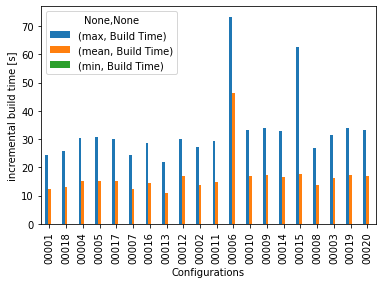

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

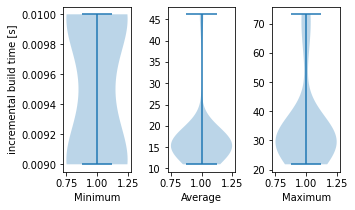

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a CSV file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,0.0105,23.1470,0.0105,0.0105,24.1540,0.0100,23.1385,23.1295,23.0970,23.1010,0.0110,0.0100,23.1805,23.1495,0.0100,0.0115,0.0105,24.3725,23.4815
00002,0.0110,NaN,25.6090,0.0095,0.0105,25.7535,0.0105,25.5770,25.5990,25.6990,25.6395,0.0100,0.0100,25.7065,25.6705,0.0100,0.0100,0.0110,27.2915,26.0445
00003,30.2950,30.3415,NaN,30.2335,31.2805,0.0100,30.3130,0.0095,0.0100,0.0095,0.0095,30.1820,30.2065,0.0105,0.0090,30.3275,31.2670,31.5400,0.0100,0.0095
00004,0.0110,0.0115,28.8435,NaN,0.0105,30.0875,0.0100,28.8075,28.6945,28.8205,28.7930,0.0110,0.0100,28.7630,28.8250,0.0100,0.0105,0.0110,30.3550,29.3975
00005,0.0115,0.0115,28.7575,0.0110,NaN,29.9565,0.0100,28.7050,28.6190,28.6995,28.7075,0.5015,0.0105,28.7440,28.7080,0.0110,0.0105,0.0105,30.6765,29.2085
00006,70.2090,70.0185,0.0095,32.6560,70.6045,NaN,70.3785,0.1450,0.0100,70.1370,0.0095,70.0510,32.5510,70.0925,0.0100,32.7130,70.1070,72.2825,73.2715,72.9330
00007,0.0105,0.0120,23.3440,0.0100,0.0100,24.5230,NaN,23.2590,23.2775,23.3590,23.3660,0.0100,0.0105,23.2960,23.3520,0.0100,0.0110,0.0110,24.3845,23.7610
00008,25.7000,26.9125,0.0095,25.8575,25.7625,0.0095,25.8170,NaN,0.0095,0.0100,0.0100,25.8110,25.7400,0.0090,0.0100,25.8215,25.8185,26.8035,0.0100,0.0090
00009,32.7010,33.5065,0.0090,32.6190,32.5960,0.0100,32.6415,0.0100,NaN,0.0090,0.0095,32.4850,32.5735,0.0090,0.0095,32.6635,32.5770,33.8145,0.0100,0.0090
